In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [6]:
df = pd.read_csv("./US_Accidents.csv")
df

,Unnamed: 0,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,...,False,False,False,True,False,Night,Night,Night,Night,2022
1,512260,A-512275,Source2,4,2022-09-08 00:42:58,2022-09-08 01:27:22,36.702473,-77.549507,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2022
2,512277,A-512296,Source2,3,2022-09-08 05:15:52,2022-09-08 06:56:14,38.816067,-77.136665,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,2022
3,512340,A-512370,Source2,2,2022-09-08 04:01:26,2022-09-08 04:30:36,37.393749,-77.514923,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,2022
4,512786,A-512860,Source3,2,2022-09-08 08:36:28,2022-09-08 09:05:37,36.882179,-79.869308,NaN,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211877,7233932,A-7283295,Source1,4,2020-01-05 13:38:48,2020-01-05 14:08:12,37.828320,-78.530060,37.83026,-78.53430,...,False,False,False,False,False,Day,Day,Day,Day,2020
211878,7234859,A-7284222,Source1,4,2020-01-06 22:41:02,2020-01-06 23:10:21,39.187370,-78.119300,39.18726,-78.12007,...,False,False,False,True,False,Night,Night,Night,Night,2020
211879,7234860,A-7284223,Source1,4,2020-01-06 22:41:02,2020-01-06 23:10:21,39.186950,-78.120030,39.18705,-78.11928,...,False,False,False,False,False,Night,Night,Night,Night,2020
211880,7234865,A-7284228,Source1,3,2020-01-06 07:26:04,2020-01-06 07:55:40,37.533470,-77.429880,37.53701,-77.42873,...,False,False,False,False,False,Day,Day,Day,Day,2020


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211882 entries, 0 to 211881
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             211882 non-null  int64  
 1   ID                     211882 non-null  object 
 2   Source                 211882 non-null  object 
 3   Severity               211882 non-null  int64  
 4   Start_Time             211882 non-null  object 
 5   End_Time               211882 non-null  object 
 6   Start_Lat              211882 non-null  float64
 7   Start_Lng              211882 non-null  float64
 8   End_Lat                176760 non-null  float64
 9   End_Lng                176760 non-null  float64
 10  Distance(mi)           211882 non-null  float64
 11  Description            211882 non-null  object 
 12  Street                 211471 non-null  object 
 13  City                   211882 non-null  object 
 14  County                 211882 non-nu

In [8]:
df.describe()

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year
count,2.118820e+05,211882.000000,211882.000000,211882.000000,176760.000000,176760.000000,211882.000000,199444.000000,198701.000000,198770.000000,199542.000000,199562.000000,199588.000000,200713.000000,211882.000000
mean,4.666409e+06,2.190313,37.888615,-77.623609,37.916220,-77.643778,0.913236,59.633276,58.510939,66.435785,29.655070,9.147616,6.634622,0.007071,2021.257256
std,1.849174e+06,0.548177,0.772757,1.093129,0.771333,1.088381,1.640274,17.618371,19.196867,22.426378,0.650227,2.253308,5.178781,0.069974,0.783571
min,5.122190e+05,1.000000,36.540838,-83.584473,36.537336,-83.507197,0.000000,-11.000000,-32.000000,1.000000,25.670000,0.000000,0.000000,0.000000,2020.000000
25%,4.018011e+06,2.000000,37.284764,-77.655887,37.315175,-77.684828,0.037000,46.000000,43.000000,48.000000,29.560000,10.000000,3.000000,0.000000,2021.000000
50%,5.023752e+06,2.000000,37.640820,-77.432918,37.694135,-77.438910,0.264000,61.000000,61.000000,67.000000,29.830000,10.000000,6.000000,0.000000,2021.000000
75%,6.050790e+06,2.000000,38.732757,-77.188149,38.749271,-77.196654,1.092000,73.000000,73.000000,87.000000,30.020000,10.000000,9.000000,0.000000,2022.000000
max,7.234880e+06,4.000000,39.434885,-75.413713,39.433896,-75.371077,57.532000,162.000000,162.000000,100.000000,30.730000,10.000000,46.000000,23.970000,2022.000000


In [9]:
df.Year.unique()

array([2022, 2021, 2020])

In [10]:
df[df['Year']==2020].Severity.unique()

array([3, 2, 4, 1])

In [11]:
df[df['Year']==2021].Severity.unique()

array([2, 3, 4, 1])

In [12]:
df[df['Year']==2022].Severity.unique()

array([1, 4, 3, 2])

In [13]:
df = df.loc[df['Year']==2020].copy()

#### Data Cleaning

In [14]:
df.Weather_Condition.unique()

array(['Mostly Cloudy', 'Cloudy', 'Fair', 'Light Rain', nan, 'Rain',
       'T-Storm', 'Partly Cloudy', 'Light Snow', 'Fog', 'Light Drizzle',
       'Drizzle', 'Heavy Snow', 'Partly Cloudy / Windy',
       'Light Rain / Windy', 'Heavy Rain', 'Mostly Cloudy / Windy',
       'Snow', 'Wintry Mix', 'Light Snow and Sleet',
       'Light Freezing Rain', 'N/A Precipitation', 'Cloudy / Windy',
       'Fair / Windy', 'Heavy Rain / Windy', 'Haze', 'Shallow Fog',
       'Heavy Drizzle', 'Fog / Windy', 'Mist', 'Rain / Windy',
       'Thunder in the Vicinity', 'Thunder', 'Heavy T-Storm / Windy',
       'Light Rain with Thunder', 'Patches of Fog', 'Heavy T-Storm',
       'T-Storm / Windy', 'Light Drizzle / Windy', 'Thunder / Windy',
       'Drizzle and Fog', 'Light Rain Shower', 'Light Snow / Windy',
       'Light Freezing Rain / Windy', 'Haze / Windy'], dtype=object)

In [15]:
rain_conditions = ["Rain", "Drizzle", "Shower", "Precipitation"]
cloudy_conditions = ["Cloudy"]
good_conditions = ["Fair"]
windy_conditions = ["Windy"]
foggy_conditions = ["Fog", "Haze", "Mist"]
storm_conditions = ["Heavy Rain", "T-Storm", "Thunder"]
snow_conditions = ["Freezing", "Sleet", "Snow", "Wintry Mix"]

In [16]:
df[['Weather_Condition']] = df[['Weather_Condition']].fillna("")

In [17]:
df['Rainy_Weather'] = df['Weather_Condition'].apply(lambda x: sum([1 for word in rain_conditions if word in x])>=1)
df['Cloudy_Weather'] = df.Weather_Condition.apply(lambda x: sum([1 for word in cloudy_conditions if word in x])>=1)
df['Good_Weather'] = df.Weather_Condition.apply(lambda x: sum([1 for word in good_conditions if word in x])>=1)
df['Windy_Weather'] = df.Weather_Condition.apply(lambda x: sum([1 for word in windy_conditions if word in x])>=1)
df['Foggy_Weather'] = df.Weather_Condition.apply(lambda x: sum([1 for word in foggy_conditions if word in x])>=1)
df['Storm_Weather'] = df.Weather_Condition.apply(lambda x: sum([1 for word in storm_conditions if word in x])>=1)
df['Snow_Weather'] = df.Weather_Condition.apply(lambda x: sum([1 for word in snow_conditions if word in x])>=1)

In [18]:
df[['Wind_Direction']] = df[['Wind_Direction']].fillna("")

df['Wind_North'] = df.Wind_Direction.apply(lambda x: "N" in x)
df['Wind_South'] = df.Wind_Direction.apply(lambda x: "S" in x)
df['Wind_East'] = df.Wind_Direction.apply(lambda x: "E" in x)
df['Wind_West'] = df.Wind_Direction.apply(lambda x: "W" in x)
df['Wind_Var'] = df.Wind_Direction.apply(lambda x: "VAR" in x)

In [19]:
df['Day_of_Week'] = pd.to_datetime(df['Start_Time'], utc=True).dt.dayofweek
df['Day_of_Month'] = pd.to_datetime(df['Start_Time'], utc=True).dt.day
df['Day_of_Year'] = pd.to_datetime(df['Start_Time'], utc=True).dt.dayofyear
df['Time_of_Day'] = pd.to_datetime(df['Start_Time'], utc=True).dt.hour

In [20]:
df['Sunrise'] = df['Sunrise_Sunset'].apply(lambda x: x=='Day')
df['Sunset'] = df['Sunrise_Sunset'].apply(lambda x: x=='Night')

In [21]:
ignore_features = ["Unnamed: 0","ID", "Street", "Description", "City", "Zipcode", "State", "Country", "County",\
                   "Timezone", "Airport_Code", "Source", "Number", "Weather_Timestamp", "Weather_Condition",\
                   "Year", "Wind_Direction", "Sunrise_Sunset", "Civil_Twilight", "Astronomical_Twilight", "Nautical_Twilight", "Start_Time", "End_Time", "Distance(mi)"]

In [22]:
df = df.loc[:, [c for c in df.columns if c not in ignore_features]]

In [23]:
df = df.dropna()

In [24]:
bool_columns = [col for col in df.columns if df[col].dtype == 'bool']
for c in bool_columns:
    df[c] = df[c].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28480 entries, 180750 to 211881
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           28480 non-null  int64  
 1   Start_Lat          28480 non-null  float64
 2   Start_Lng          28480 non-null  float64
 3   End_Lat            28480 non-null  float64
 4   End_Lng            28480 non-null  float64
 5   Temperature(F)     28480 non-null  float64
 6   Wind_Chill(F)      28480 non-null  float64
 7   Humidity(%)        28480 non-null  float64
 8   Pressure(in)       28480 non-null  float64
 9   Visibility(mi)     28480 non-null  float64
 10  Wind_Speed(mph)    28480 non-null  float64
 11  Precipitation(in)  28480 non-null  float64
 12  Amenity            28480 non-null  int64  
 13  Bump               28480 non-null  int64  
 14  Crossing           28480 non-null  int64  
 15  Give_Way           28480 non-null  int64  
 16  Junction        

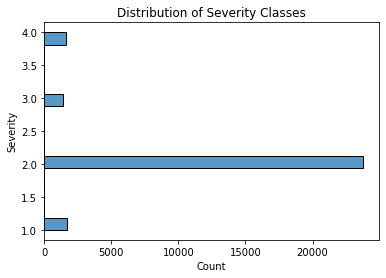

In [26]:
import seaborn as sns
sns.histplot(df, y='Severity')
plt.title("Distribution of Severity Classes")
plt.savefig("class_distribution.png", dpi=300)

#### Model Training

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
evaluation_column = "Severity"
X_train, X_test, Y_train, Y_test = train_test_split(df[[c for c in df.columns if c!=evaluation_column]], df[[evaluation_column]], test_size=0.2, random_state=42, stratify=df["Severity"])

##### Random Oversampling

In [29]:
oversample=False

In [30]:
import imblearn
from imblearn.over_sampling import *

oversample = RandomOverSampler(sampling_strategy='minority')

# treat all 3 minority classes
X_over, Y_over = oversample.fit_resample(X_train, Y_train)

X_over, Y_over = oversample.fit_resample(X_over, Y_over)

X_over, Y_over = oversample.fit_resample(X_over, Y_over)

array([[<AxesSubplot:title={'center':'Severity'}>]], dtype=object)

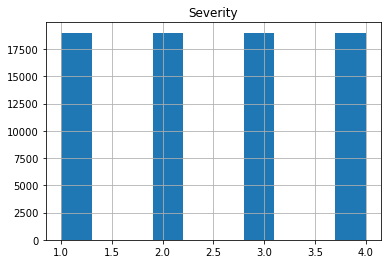

In [31]:
Y_over.hist()

In [32]:
if oversample:
    X_train, Y_train = X_over, Y_over

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76032 entries, 0 to 76031
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Start_Lat          76032 non-null  float64
 1   Start_Lng          76032 non-null  float64
 2   End_Lat            76032 non-null  float64
 3   End_Lng            76032 non-null  float64
 4   Temperature(F)     76032 non-null  float64
 5   Wind_Chill(F)      76032 non-null  float64
 6   Humidity(%)        76032 non-null  float64
 7   Pressure(in)       76032 non-null  float64
 8   Visibility(mi)     76032 non-null  float64
 9   Wind_Speed(mph)    76032 non-null  float64
 10  Precipitation(in)  76032 non-null  float64
 11  Amenity            76032 non-null  int64  
 12  Bump               76032 non-null  int64  
 13  Crossing           76032 non-null  int64  
 14  Give_Way           76032 non-null  int64  
 15  Junction           76032 non-null  int64  
 16  No_Exit            760

###### Quick Random Forest Model (Simple)

In [34]:
model = RandomForestClassifier(max_depth=30)
model.fit(X_train, Y_train["Severity"])

RandomForestClassifier(max_depth=30)

In [35]:
Y_predict = model.predict(X_test)

In [36]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
print(balanced_accuracy_score(Y_test, Y_predict))
confusion_matrix(Y_test, Y_predict)

0.71149066701074


array([[ 255,   71,   13,    1],
       [  80, 4426,   41,  205],
       [   5,   53,  207,    9],
       [   1,  181,   13,  135]])

In [37]:
print(f1_score(Y_test, Y_predict, average='micro'))
print(f1_score(Y_test, Y_predict, average='weighted'))
print(f1_score(Y_test, Y_predict, average='macro'))

NameError: name 'f1_score' is not defined

##### Hyperparameter Tuning Search

In [53]:
param_grid = [
  {'n_estimators': [50, 100], 'max_features': [3, 5, 10, 15], "max_depth": [25, 35, 50]},
]

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted', return_train_score=True)
grid_search.fit(X_train, Y_train['Severity'])

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_depth': [25, 35, 50],
                          'max_features': [3, 5, 10, 15],
                          'n_estimators': [50, 100]}],
             return_train_score=True, scoring='f1_weighted')

In [54]:
grid_search.best_params_

{'max_depth': 50, 'max_features': 3, 'n_estimators': 100}

[8.81861448e-02 8.57410487e-02 8.84504014e-02 8.73682549e-02
 4.39698707e-02 4.42742355e-02 4.49071020e-02 5.63240463e-02
 1.12577714e-02 3.45236827e-02 9.22500783e-03 9.75670268e-04
 1.75382221e-06 8.86639527e-03 1.65203039e-03 7.35877254e-03
 2.51496760e-04 3.68472820e-04 0.00000000e+00 1.26760167e-03
 2.09085836e-03 2.79490768e-05 2.69336023e-02 0.00000000e+00
 4.95819384e-03 7.23062115e-03 7.25973475e-03 2.09958531e-03
 1.10391111e-03 1.58996973e-03 5.50034951e-04 7.86815096e-03
 8.70789302e-03 6.94327944e-03 8.20298401e-03 2.55565476e-03
 3.03369996e-02 3.62356011e-02 1.32819589e-01 5.70402995e-02
 1.71477369e-02 2.33275916e-02]


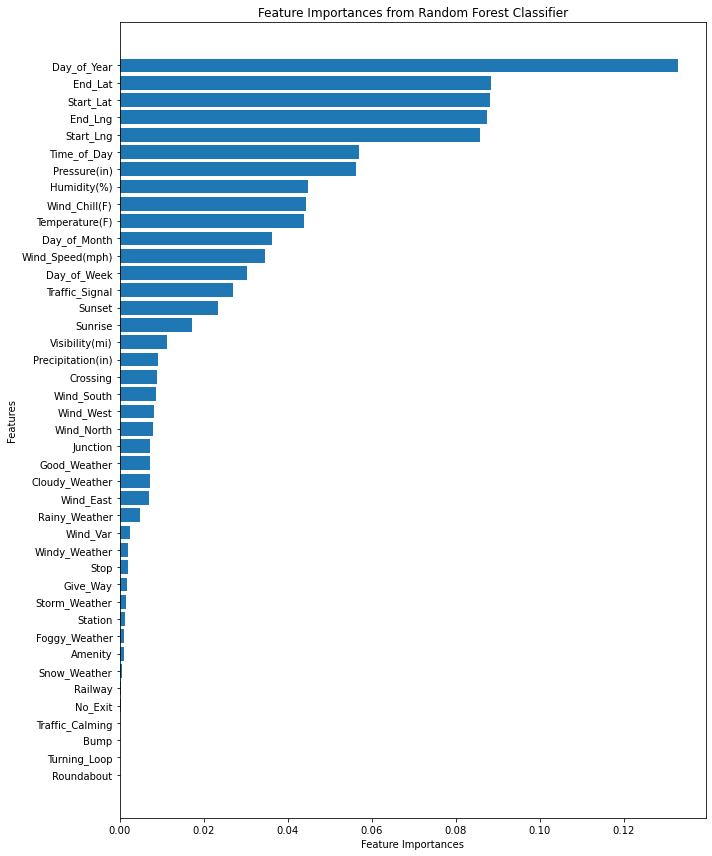

In [38]:
# BEST: {'max_depth': 40, 'max_features': 15, 'n_estimators': 50}
best_params = {'max_depth': 50, 'max_features': 3, 'n_estimators': 100}

grid_best = RandomForestClassifier(max_depth=best_params['max_depth'], max_features=best_params['max_features'], n_estimators=best_params['n_estimators']) 
#grid_best = grid_search.best_estimator_.fit(X_train, Y_train['Severity'])
model = grid_best.fit(X_train, Y_train['Severity'])
print(model.feature_importances_)

plt.figure(figsize=(10, 12))
feature_importances_sorted = sorted(zip(model.feature_importances_, X_train.columns))
plt.barh([x[1] for x in feature_importances_sorted], [x[0] for x in feature_importances_sorted])
plt.title("Feature Importances from Random Forest Classifier")
plt.xlabel("Feature Importances")
plt.ylabel("Features")

plt.tight_layout()
plt.savefig("feature_importances.png", dpi=300)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_fscore_support
Y_predict = model.predict(X_test)
print(precision_recall_fscore_support(Y_test, Y_predict))

print(accuracy_score(Y_test, Y_predict))
print(precision_score(Y_test, Y_predict, average='weighted'))
print(recall_score(Y_test, Y_predict, average='weighted'))
print(f1_score(Y_test, Y_predict, average='weighted'))

conf_matrix = confusion_matrix(Y_test, Y_predict)
print(conf_matrix)
print(conf_matrix.diagonal()/conf_matrix.sum(axis=1))

(array([0.77960526, 0.92670266, 0.78481013, 0.39528024]), array([0.69705882, 0.9391835 , 0.67883212, 0.40606061]), array([0.73602484, 0.93290134, 0.72798434, 0.40059791]), array([ 340, 4752,  274,  330]))
0.8813202247191011
0.880308509819815
0.8813202247191011
0.8804530590211489
[[ 237   93    9    1]
 [  63 4463   30  196]
 [   3   77  186    8]
 [   1  183   12  134]]
[0.69705882 0.9391835  0.67883212 0.40606061]


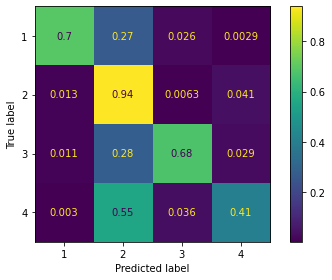

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
#disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_, normalize="all")
disp = ConfusionMatrixDisplay.from_predictions(Y_test, Y_predict, display_labels=model.classes_, normalize="true")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)
#disp.plot()

In [41]:
print(sorted(zip(model.feature_importances_, X_train.columns), reverse=True)[:10])

[(0.13281958869827154, 'Day_of_Year'), (0.0884504014068396, 'End_Lat'), (0.08818614478402732, 'Start_Lat'), (0.08736825489852978, 'End_Lng'), (0.08574104870486514, 'Start_Lng'), (0.05704029951216958, 'Time_of_Day'), (0.056324046250776805, 'Pressure(in)'), (0.04490710201783873, 'Humidity(%)'), (0.04427423546199112, 'Wind_Chill(F)'), (0.043969870674612915, 'Temperature(F)')]


In [42]:
from sklearn.tree import plot_tree
top_15_features = sorted(zip(model.feature_importances_, X_train.columns), reverse=True)[:15]

simple_model = RandomForestClassifier(n_estimators=100, max_depth=5)
simple_model.fit(X_train[[c for i, c in top_15_features]], Y_train["Severity"])

best_est = (-1, None)
for est in simple_model.estimators_:
    Y_predict = est.predict(X_test[[c for i, c in top_15_features]])
    score = f1_score(Y_test, Y_predict, average="weighted")
    if score > best_est[0]:
        best_est = (score, est)

/home/al7gc/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/al7gc/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/al7gc/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/al7gc/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/al7gc/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/al7gc/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but

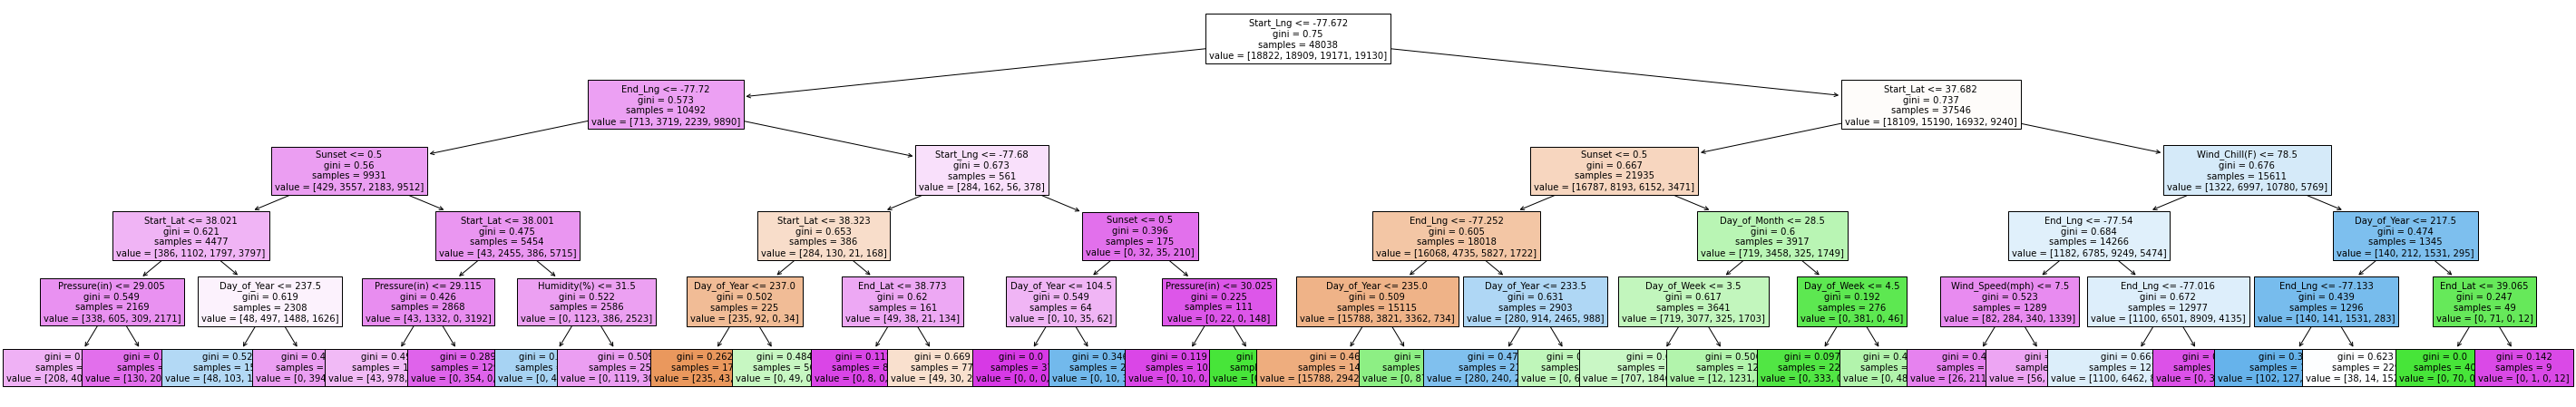

In [43]:
plt.figure(figsize=(50, 8))
plot_tree(best_est[1], max_depth=5, feature_names = [c for i, c in top_15_features], fontsize=10, filled=True)
plt.savefig("simplified_decision_tree.png")

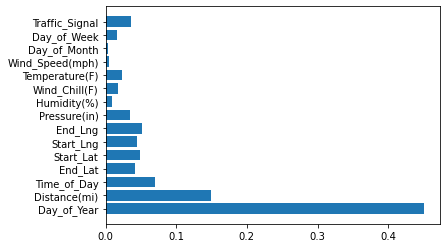

In [33]:
plt.barh([c for i, c in top_15_features], simple_model.feature_importances_)
plt.savefig("simple_feature_importances.png", dpi=300)

#### Visualizations

In [44]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Rainy_Weather', 'Cloudy_Weather', 'Good_Weather',
       'Windy_Weather', 'Foggy_Weather', 'Storm_Weather', 'Snow_Weather',
       'Wind_North', 'Wind_South', 'Wind_East', 'Wind_West', 'Wind_Var',
       'Day_of_Week', 'Day_of_Month', 'Day_of_Year', 'Time_of_Day', 'Sunrise',
       'Sunset'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28480 entries, 180750 to 211881
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           28480 non-null  int64  
 1   Start_Lat          28480 non-null  float64
 2   Start_Lng          28480 non-null  float64
 3   End_Lat            28480 non-null  float64
 4   End_Lng            28480 non-null  float64
 5   Temperature(F)     28480 non-null  float64
 6   Wind_Chill(F)      28480 non-null  float64
 7   Humidity(%)        28480 non-null  float64
 8   Pressure(in)       28480 non-null  float64
 9   Visibility(mi)     28480 non-null  float64
 10  Wind_Speed(mph)    28480 non-null  float64
 11  Precipitation(in)  28480 non-null  float64
 12  Amenity            28480 non-null  int64  
 13  Bump               28480 non-null  int64  
 14  Crossing           28480 non-null  int64  
 15  Give_Way           28480 non-null  int64  
 16  Junction        

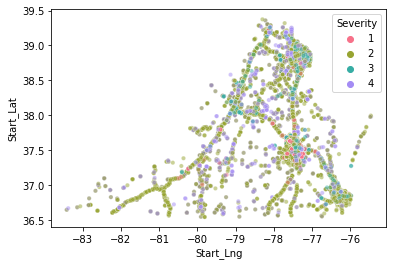

In [46]:
import seaborn as sns

sns.scatterplot(data=df, x='Start_Lng', y='Start_Lat', hue='Severity', alpha = 0.5, s=18, palette=sns.color_palette("husl", 4))
plt.savefig("geographical_severity.png", dpi=300)

<AxesSubplot:xlabel='Wind_Chill(F)', ylabel='Wind_Speed(mph)'>

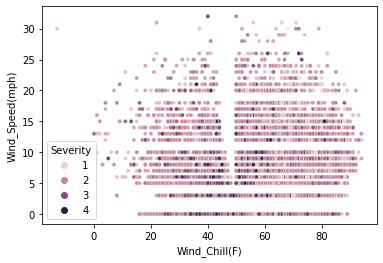

In [47]:
#fig, axs = plt.subplots(nrows=2, ncols=2)
sns.scatterplot(data=df, x='Wind_Chill(F)', y='Wind_Speed(mph)', hue="Severity", s=15, alpha=0.5)

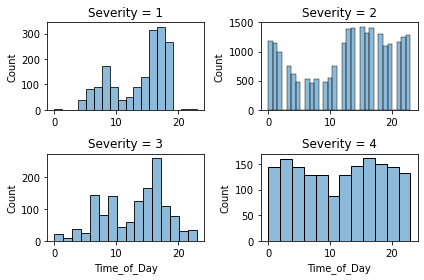

In [153]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Time_of_Day"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

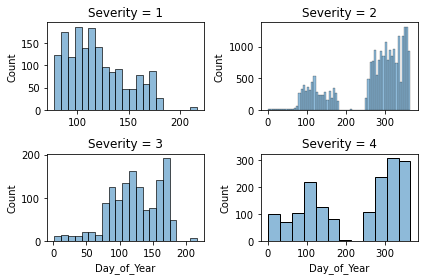

In [154]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Day_of_Year"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

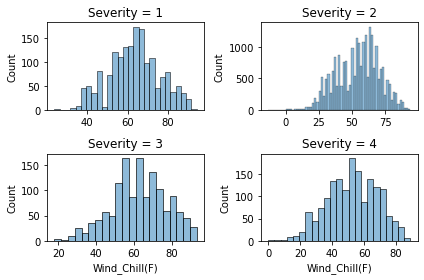

In [155]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Wind_Chill(F)"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

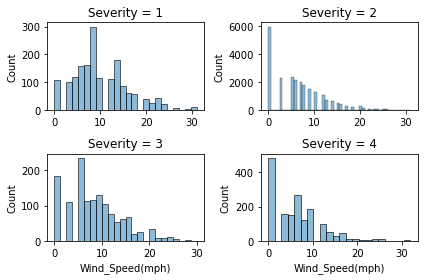

In [156]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Wind_Speed(mph)"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

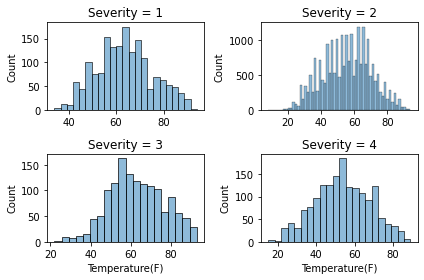

In [157]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Temperature(F)"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

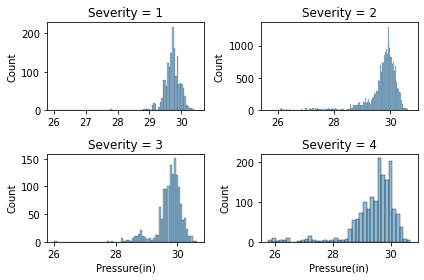

In [158]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Pressure(in)"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

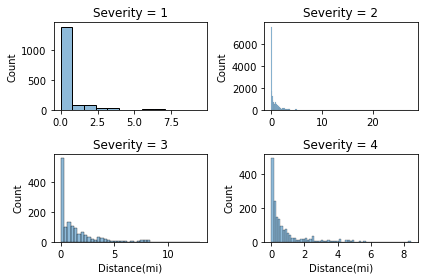

In [160]:
fig, axs = plt.subplots(nrows=2, ncols=2)

column = "Distance(mi)"

sns.histplot(df[df['Severity']==1], x=column, alpha=0.5, ax=axs[0][0])
axs[0][0].set_title("Severity = 1")
axs[0][0].set_xlabel("")

sns.histplot(df[df['Severity']==2], x=column, alpha=0.5, ax=axs[0][1])
axs[0][1].set_title("Severity = 2")
axs[0][1].set_xlabel("")

sns.histplot(df[df['Severity']==3], x=column, alpha=0.5, ax=axs[1][0])
axs[1][0].set_title("Severity = 3")

sns.histplot(df[df['Severity']==4], x=column, alpha=0.5, ax=axs[1][1])
axs[1][1].set_title("Severity = 4")

plt.tight_layout()
plt.savefig(f"feature_{column}.png", dpi=300)

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

top_15_features = sorted(zip(model.feature_importances_, X_train.columns), reverse=True)[:15]
top_15_feature_columns = [c for i, c in top_15_features]
for column_name in top_15_feature_columns:

    fig, axs = plt.subplots(nrows = 2, ncols=2)
    df_temp = X_test
    df_column_dict = {c: i for i,c in enumerate(df_temp)}
    features = [df_column_dict[column_name]]

    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=1, ax=axs[0][0])
    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=2, ax=axs[0][1])
    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=3, ax=axs[1][0])
    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=4, ax=axs[1][1])
    
    axs[0][0].set_title("Severity 1")
    axs[0][1].set_title("Severity 2")
    axs[1][0].set_title("Severity 3")
    axs[1][1].set_title("Severity 4")
    
    plt.tight_layout()
    plt.savefig(f"feature_{column_name}.png", dpi=300)

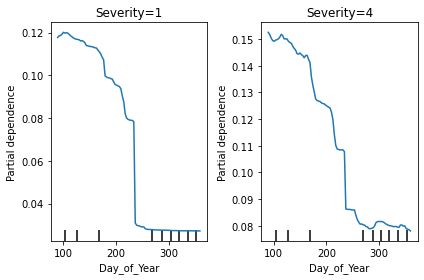

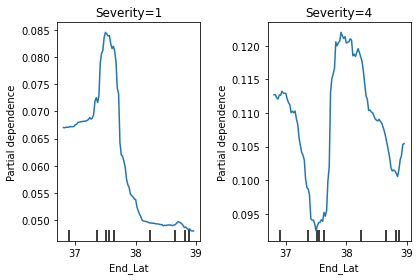

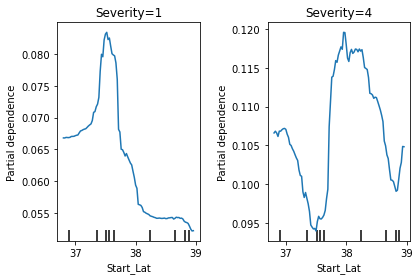

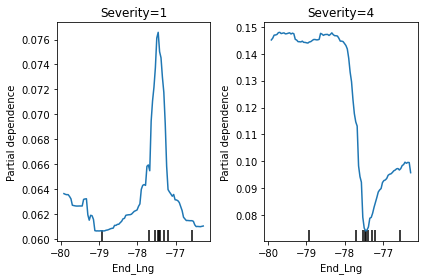

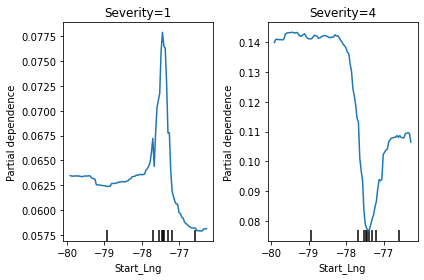

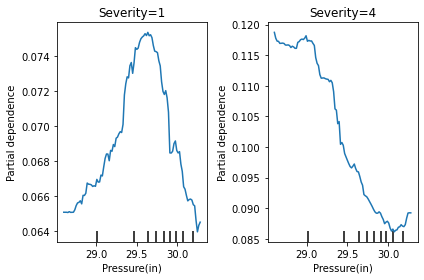

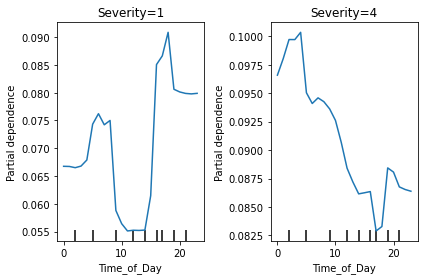

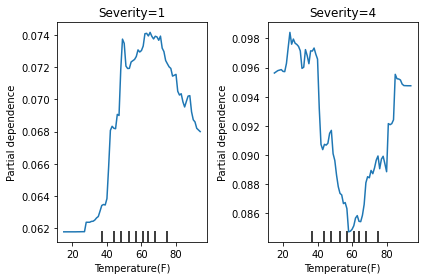

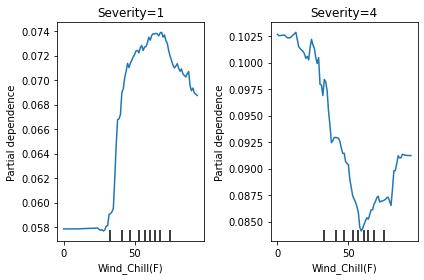

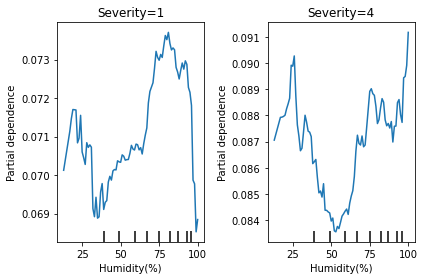

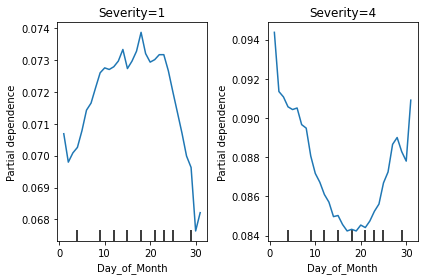

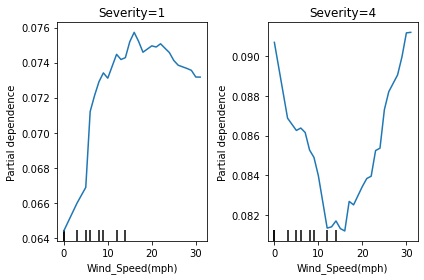

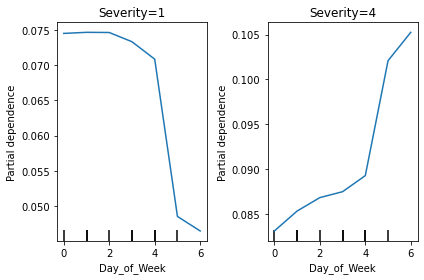

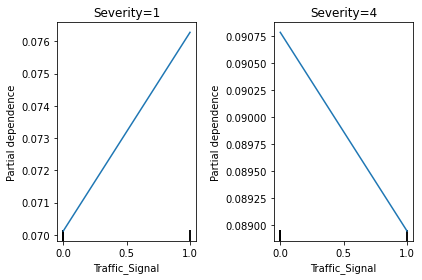

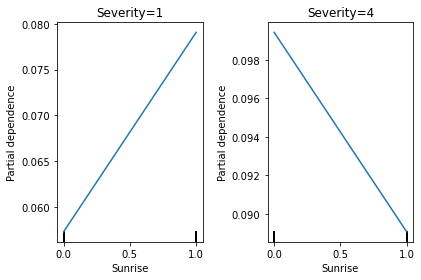

In [41]:
from sklearn.inspection import PartialDependenceDisplay

top_15_features = sorted(zip(model.feature_importances_, X_train.columns), reverse=True)[:15]
top_15_feature_columns = [c for i, c in top_15_features]
for column_name in top_15_feature_columns:

    fig, axs = plt.subplots(ncols=2)
    df_temp = X_test
    df_column_dict = {c: i for i,c in enumerate(df_temp)}
    features = [df_column_dict[column_name]]

    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=1, ax=axs[0])
    axs[0].set_title("Severity=1")
    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=4, ax=axs[1])
    axs[1].set_title("Severity=4")

    plt.tight_layout()
    plt.savefig(f"feature_pd_{column_name}_2.png", dpi=300)

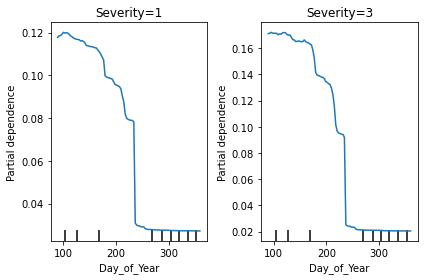

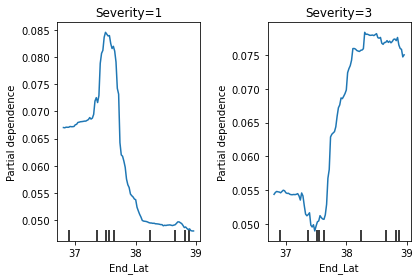

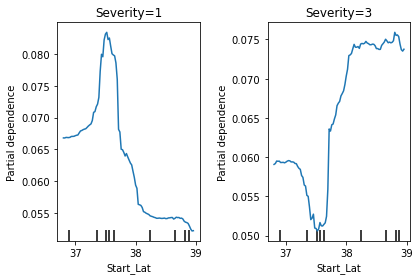

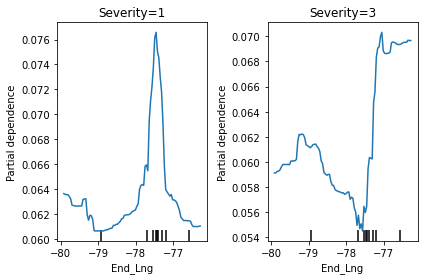

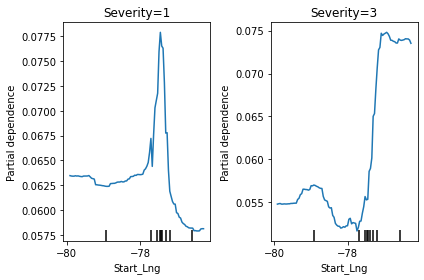

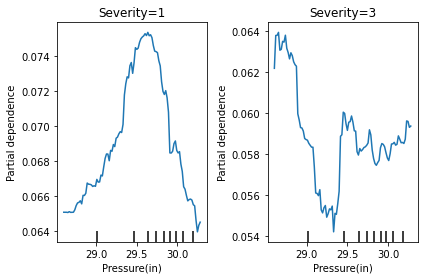

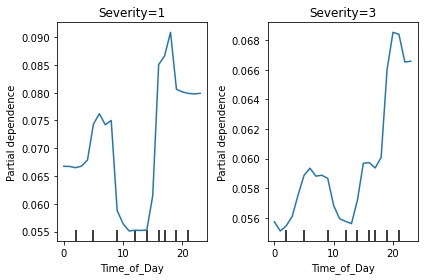

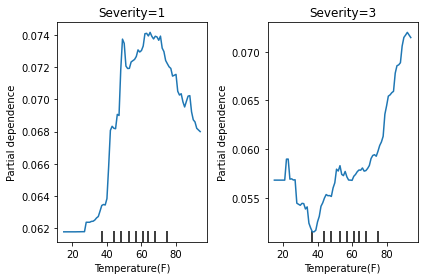

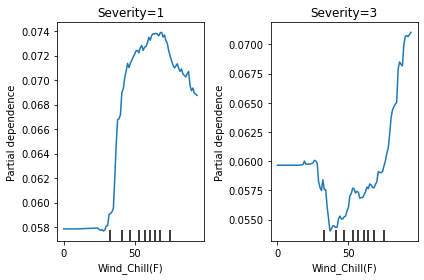

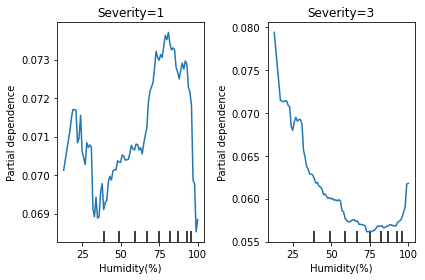

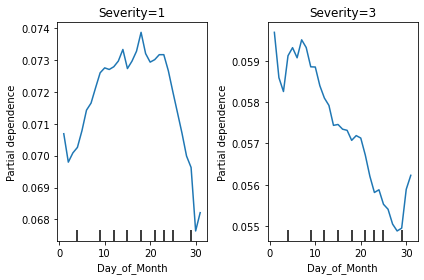

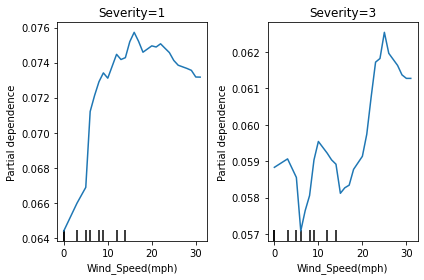

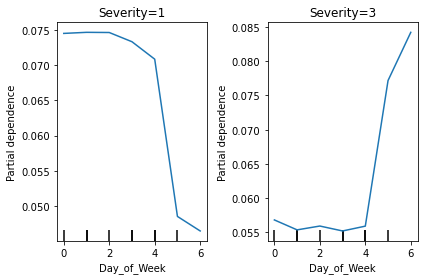

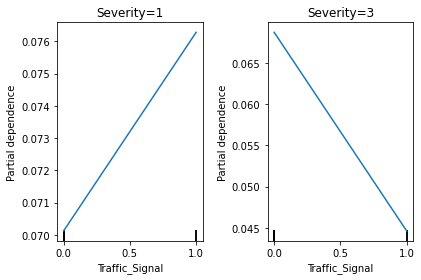

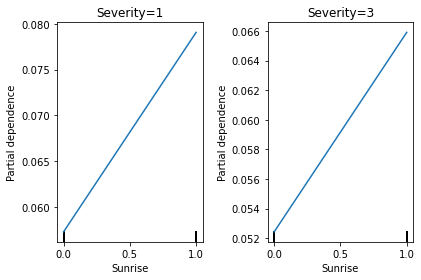

In [42]:
from sklearn.inspection import PartialDependenceDisplay

top_15_features = sorted(zip(model.feature_importances_, X_train.columns), reverse=True)[:15]
top_15_feature_columns = [c for i, c in top_15_features]
for column_name in top_15_feature_columns:

    fig, axs = plt.subplots(ncols=2)
    df_temp = X_test
    df_column_dict = {c: i for i,c in enumerate(df_temp)}
    features = [df_column_dict[column_name]]

    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=1, ax=axs[0])
    axs[0].set_title("Severity=1")
    PartialDependenceDisplay.from_estimator(model, df_temp, features, target=3, ax=axs[1])
    axs[1].set_title("Severity=3")

    plt.tight_layout()
    plt.savefig(f"feature_pd_{column_name}_2_13.png", dpi=300)